# 2- Data preprocessing e ingeniería de características

Ingeniería de características. Ejercicio práctico con los datos de Pokémon:

- Handling missing data
- Grouping sparse classes
- Bin numerical data
- Handling outliers
- Transform variables

In [379]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import re

# Figures inline and set visualization style
%matplotlib inline
sns.set()

np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']

In [380]:
# cargar los datos
df = pd.read_csv('./data/pokemon.csv')
# ver los 10 primeros vectores de características
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Handling missing data

In [381]:
# ver valores únicos que toma la variable 'Type 2'
print(np.unique(df['Type 2'].astype(str)))

['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water' 'nan']


In [382]:
# cuántos valores nulos tiene la variable 'Type 2' en relación al resto de variables?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

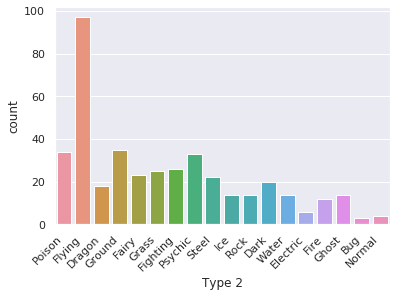

In [383]:
# plotear histograma para ver distribución de la variable 'Type 2'
sns.countplot(x='Type 2', data=df)
plt.xticks(rotation=45, ha='right')

In [384]:
# rellenar valores nulos de la variable 'Type 2' con 'Uknown'
df['Type 2'].fillna('Unknown', inplace=True)
# comprobar que efectivamente ya no hay nulos en la matriz de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

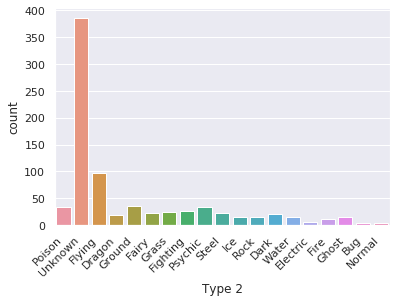

In [385]:
# plotear histograma para ver nuevamente la distribución de la variable 'Type 2'
sns.countplot(x='Type 2', data=df)
plt.xticks(rotation=45, ha='right')

### Grouping sparse classes

In [403]:
# crear variable 'has_2nd_type' que determine 'Known' o 'Unknown' en función de si 'Type 2' es conocido o no
df['has_2nd_type'] = 'Known'
df['has_2nd_type'][df['Type 2']=='Unknown'] = 'Unknown'
# nos quedamos con las variables ['Type 1', 'Type 2', 'has_2nd_type', 'Attack', 'Defense']
df_reduced = df[['Type 1', 'Type 2', 'has_2nd_type', 'Attack', 'Defense']]
df_reduced.head()

,Type 1,Type 2,has_2nd_type,Attack,Defense
0,Grass,Poison,Known,49,49
1,Grass,Poison,Known,62,63
2,Grass,Poison,Known,82,83
3,Grass,Poison,Known,100,123
4,Fire,Unknown,Unknown,52,43


(array([0, 1]), <a list of 2 Text xticklabel objects>)

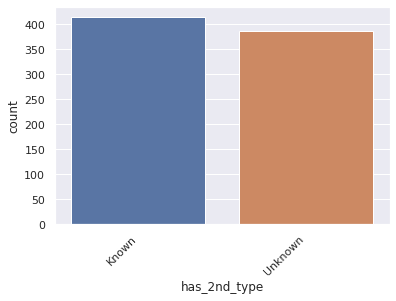

In [404]:
# plotear histograma para ver la distribución de la variable 'has_2nd_type' que acabamos de crear
sns.countplot(x='has_2nd_type', data=df_reduced)
plt.xticks(rotation=45, ha='right')

Tendríamos que ver cómo los datos estarían ahora muy bien balanceados en función de si 'Type 2' es conocido o no

### Handling outliers

165.0
5.0


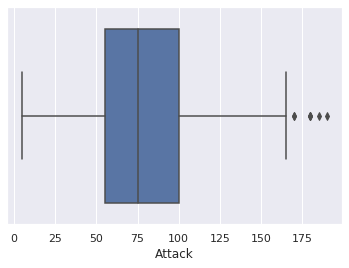

In [405]:
# chequear el boxplot de valores de la variable 'Atack'
sns.boxplot(df_reduced.Attack)
# calcular los valores umbrales basados en los percentiles
upper_limit_attack = df_reduced.Attack.quantile(.99)
print(upper_limit_attack)
lower_limit_attack = df_reduced.Attack.quantile(0)
print(lower_limit_attack)

In [406]:
# qué Pokémons tendrían unos valores de ataque que se podrían considerar como outliers según los percentiles usados?
df_reduced[df_reduced.Attack.values > upper_limit_attack]

,Type 1,Type 2,has_2nd_type,Attack,Defense
163,Psychic,Fighting,Known,190,100
232,Bug,Fighting,Known,185,115
424,Ground,Fire,Known,180,160
426,Dragon,Flying,Known,180,100
429,Psychic,Unknown,Unknown,180,20
494,Dragon,Ground,Known,170,115
711,Dragon,Ice,Known,170,100


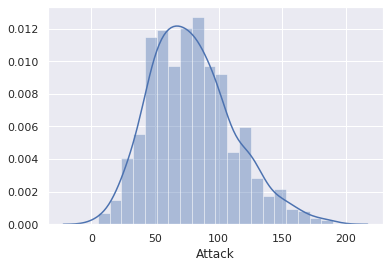

In [442]:
# hacer el mismo ejercicio con la std respecto del valor medio
sns.distplot(df_reduced.Attack)

In [408]:
# qué Pokémons tendrían unos valores de ataque que se podrían considerar como outliers según las desviaciones típicas?
mean_attack = np.mean(df_reduced.Attack.values)
std_attack = np.std(df_reduced.Attack.values)
print(mean_attack+(3*std_attack))
print(mean_attack-(3*std_attack))
df_reduced_encoded[df_reduced.Attack.values > (mean_attack+(3*std_attack))]

176.3124710176067
-18.3099710176067


,Type 1,Attack,Defense,Type2_id
163,Psychic,190,100,1
232,Bug,185,115,1
424,Ground,180,160,1
426,Dragon,180,100,1
429,Psychic,180,20,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 799
Data columns (total 5 columns):
Type 1          795 non-null object
Type 2          795 non-null object
has_2nd_type    795 non-null object
Attack          795 non-null int64
Defense         795 non-null int64
dtypes: int64(2), object(3)
memory usage: 37.3+ KB


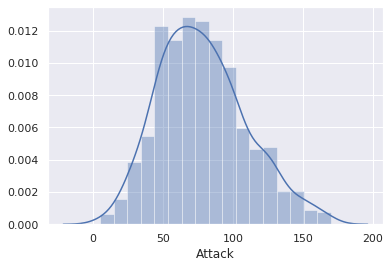

In [409]:
# elegir uno de los dos métodos para eliminar los outliers > umbral superior
df_reduced_normal = df_reduced[df_reduced.Attack.values < (mean_attack+(3*std_attack))]
df_reduced_normal.info()
# plotear distribución en base al método empleado
sns.distplot(df_reduced_normal.Attack)

De este modo eliminaremos un porcentaje mínimo de datos (en torno a un 1%-5%) que muestran valores lejos de lo que podríamos considerar como "normal" o patrón que queremos modelar

### Bin numerical data

In [410]:
# crear bins de tamaño 4 para las variables 'Attack' y 'Defense' y asignar los valores a 2 nuevas variables: 'CatAttack' y 'CatDefense'
df_reduced_normal['CatAttack'] = pd.qcut(df_reduced_normal.Attack, q=4, labels=False)
df_reduced_normal['CatDefense']= pd.qcut(df_reduced_normal.Defense, q=4, labels=False)
df_reduced_normal.head()

,Type 1,Type 2,has_2nd_type,Attack,Defense,CatAttack,CatDefense
0,Grass,Poison,Known,49,49,0,0
1,Grass,Poison,Known,62,63,1,1
2,Grass,Poison,Known,82,83,2,2
3,Grass,Poison,Known,100,123,2,3
4,Fire,Unknown,Unknown,52,43,0,0


In [411]:
# eliminar las variables 'Attack' y 'Defense'
df_reduced_normal_bins = df_reduced_normal.drop(['Attack','Defense'], axis=1)
df_reduced_normal_bins.head()

,Type 1,Type 2,has_2nd_type,CatAttack,CatDefense
0,Grass,Poison,Known,0,0
1,Grass,Poison,Known,1,1
2,Grass,Poison,Known,2,2
3,Grass,Poison,Known,2,3
4,Fire,Unknown,Unknown,0,0


Se debería obtener una categorización de ataque y defensa mucho más reducida y manejable

### Transform variables

In [412]:
# usar label encoder para transformar la variable 'Type 1' a tipo numérico
type1_le = LabelEncoder()
type1_le_labels = type1_le.fit_transform(df_reduced_normal_bins['Type 1'])
df_reduced_normal_bins['Type1_id'] = type1_le_labels
# comprobar índices asociados a cada valor categórico de 'Type 1'
type1_mappings = {index: label for index, label in enumerate(type1_le.classes_)}
type1_mappings

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water'}

In [413]:
# borrar la variable numérica 'Type 1' y 'Type 2' y ver tabla resultante
df_reduced_normal_bins_encoded = df_reduced_normal_bins.drop(['Type 1', 'Type 2'], axis=1)
df_reduced_normal_bins_encoded.head()

,has_2nd_type,CatAttack,CatDefense,Type1_id
0,Known,0,0,9
1,Known,1,1,9
2,Known,2,2,9
3,Known,2,3,9
4,Unknown,0,0,6


In [414]:
# usar 'get_dummies' para obtener un valor numérico para la variable categórica 'has_2nd_type'
df_reduced_normal_bins_encoded_trans = pd.get_dummies(df_reduced_normal_bins_encoded)
df_reduced_normal_bins_encoded_trans.head()

,CatAttack,CatDefense,Type1_id,has_2nd_type_Known,has_2nd_type_Unknown
0,0,0,9,1,0
1,1,1,9,1,0
2,2,2,9,1,0
3,2,3,9,1,0
4,0,0,6,0,1


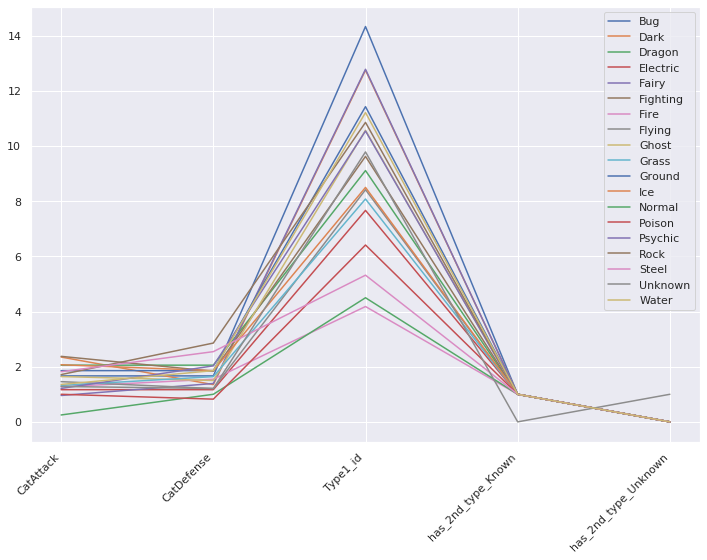

In [421]:
# plotear el patrón (valor medio) correspondiente a cada valor de la variable 'Type 2'
plt.figure(figsize=(12,8))
for type2 in np.unique(df_reduced_normal_bins['Type 2']):
    plt.plot(np.mean(df_reduced_normal_bins_encoded_trans[df_reduced_normal_bins['Type 2'].values==type2],axis=0), label=type2)
plt.xticks(rotation=45, ha='right')
plt.legend()

Ya podemos trabajar los datos con modelos de ML para lanzar predicciones (lo veremos más adelante a lo largo del curso...). Repaso de lo que hemos visto en este notebook:

- Hemos seleccionado las columnas que más información aportan
- Hemos trabajado la presencia de valores nulos
- Hemos eliminado valores atípicos (posibles outliers) que pueden influir en la eficiencia y la bondad del ajuste de los modelos 
- Hemos transformado variables categóricas o discretas en numéricas

### What's next?

- Métodos y estrategias para el preprocesado de los datos
- Generación y aprendizaje de modelos!